# 1-Import Libraries

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# 2-Read Datset

In [2]:
df=pd.read_csv('E:/Dataset/income-Kmeans.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# 3-Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [4]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

# 4-Data Visualization 

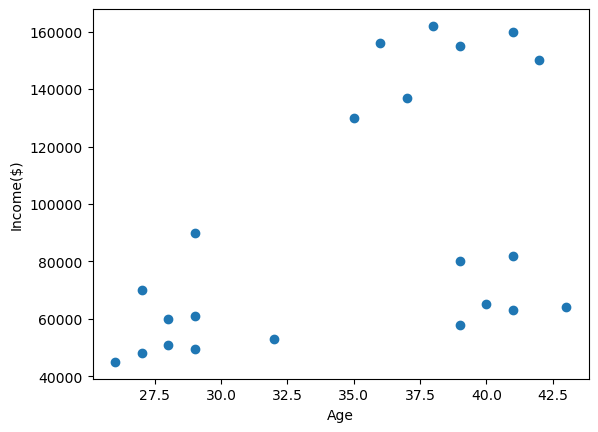

In [5]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

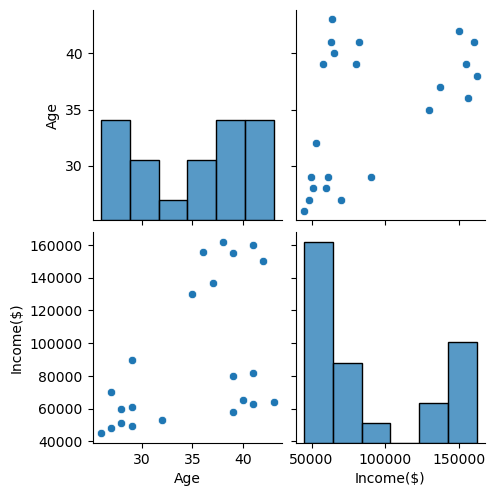

In [6]:
sns.pairplot(df)

# 5-Data Preprocessing

In [7]:
# scaling data 
scaler=MinMaxScaler()
df[['Age','Income($)']]=scaler.fit_transform(df[['Age','Income($)']])

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [9]:
# drop unnecessary columns 
df.drop('Name',axis=1,inplace=True)
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


# 6-Elbow Method

In [10]:
scores_list=[]
k_range=range(1,10)
for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df)
    scores_list.append(kmeans_model.inertia_)

Text(0, 0.5, 'sum of squered error ')

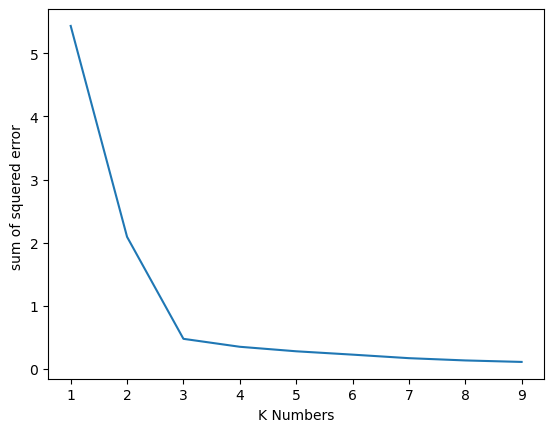

In [11]:
plt.plot(k_range,scores_list)
plt.xlabel('K Numbers')
plt.ylabel('sum of squered error ')

# 7-Silhouette score

In [13]:
scores=[]
silhouette_scores=[]
k_range=range(2,10)
for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    y_pred=kmeans_model.fit_predict(df)
    scores.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(df,y_pred))
    print('k',k,':',kmeans_model.inertia_)
    print('silhouette_score: %0.4f' % silhouette_score(df,y_pred))

k 2 : 2.091136388699078
silhouette_score: 0.5601
k 3 : 0.4750783498553096
silhouette_score: 0.7130
k 4 : 0.34910470944195654
silhouette_score: 0.6257
k 5 : 0.26640301246684156
silhouette_score: 0.5036
k 6 : 0.22589089371465976
silhouette_score: 0.4227
k 7 : 0.18185811965571239
silhouette_score: 0.3042
k 8 : 0.13265419827245162
silhouette_score: 0.3580
k 9 : 0.10383752586603562
silhouette_score: 0.3298


In [14]:
# maximize silhouette score ---->k=3

Text(0, 0.5, 'k_means distance ')

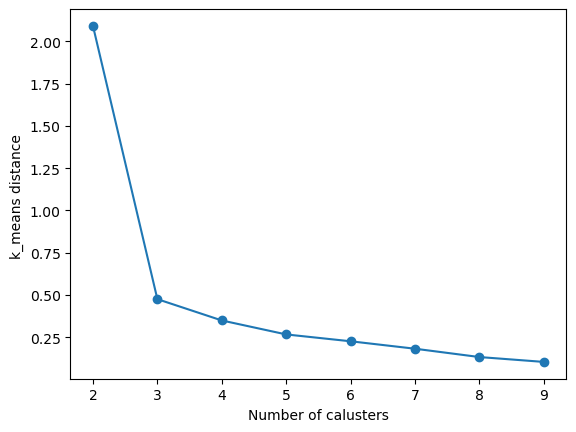

In [15]:
plt.plot(k_range,scores,marker='o')
plt.xlabel('Number of calusters')
plt.ylabel('k_means distance ')

# 8-Building KMeans Model With the best Num of k

# KMeans Clustering 

In [16]:
kmeans_model=KMeans(n_clusters=3,random_state=42)
kmeans_model.fit(df)
y_pred=kmeans_model.fit_predict(df)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [17]:
# Adding the predicted Cluster to data 
df['cluster']=y_pred
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [18]:
# to print cluster centers 
kmeans_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [19]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [20]:
 df0

,Age,Income($),cluster
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0


In [21]:
 df1

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1
12,0.058824,0.025641,1
13,0.117647,0.051282,1
14,0.176471,0.038462,1
15,0.352941,0.068376,1


In [22]:
 df2

,Age,Income($),cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


In [ ]:

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color='purple',
           marker='*',label='centroid')